# Explore Data

Exploring the fetched data with visualizations and summary.

## Setup Environment and Load Data

In [29]:
import json
import os

# suppress seaborn/scipy warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import seaborn as sns
import yake
from datetime import datetime

data_dir = os.path.abspath('data')

# today = datetime.today()
today = datetime.strptime('2022-09-27', '%Y-%m-%d')
today_s = today.strftime('%Y%m%d')

anime_df = pd.read_csv(os.path.join(data_dir, f'anime-{today_s}-clean.csv'))
anime_raw_df = pd.read_csv(os.path.join(data_dir, f'anime-{today_s}-raw.csv'))
user_df = pd.read_csv(os.path.join(data_dir, f'user-{today_s}-clean.csv'))
enriched_df = pd.read_csv(os.path.join(data_dir, f'user-{today_s}-enriched.csv'))

## Anime Data Visualizations

         source  count
0   LIGHT_NOVEL    715
1         MANGA   3674
2      ORIGINAL   4249
3         OTHER   3244
4    VIDEO_GAME    769
5  VISUAL_NOVEL    311


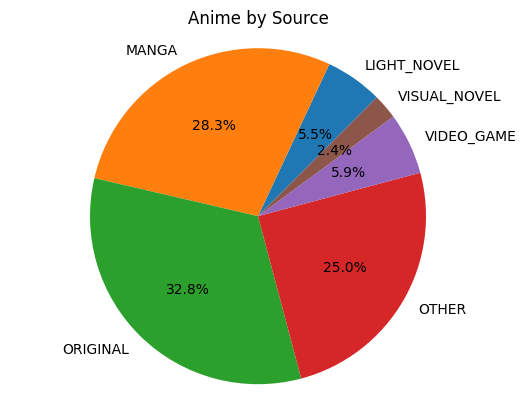

In [30]:
df = (anime_df.groupby(['source']).size().reset_index(name='count'))
print(df)

fig, ax = plt.subplots()
ax.set_title('Anime by Source')
ax.pie(df['count'], labels=df['source'], autopct='%1.1f%%', startangle=45)
ax.axis('equal')

plt.show()
plt.close()

   season  count
0    FALL   3040
1  SPRING   3208
2  SUMMER   2853
3  WINTER   3861


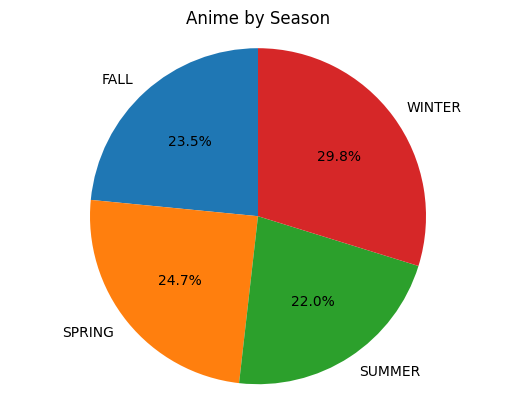

In [31]:
df = (anime_df.groupby(['season']).size().reset_index(name='count'))
print(df)

fig, ax = plt.subplots()
ax.set_title('Anime by Season')
ax.pie(df['count'], labels=df['season'], autopct='%1.1f%%', startangle=90)
ax.axis('equal')

plt.show()
plt.close()

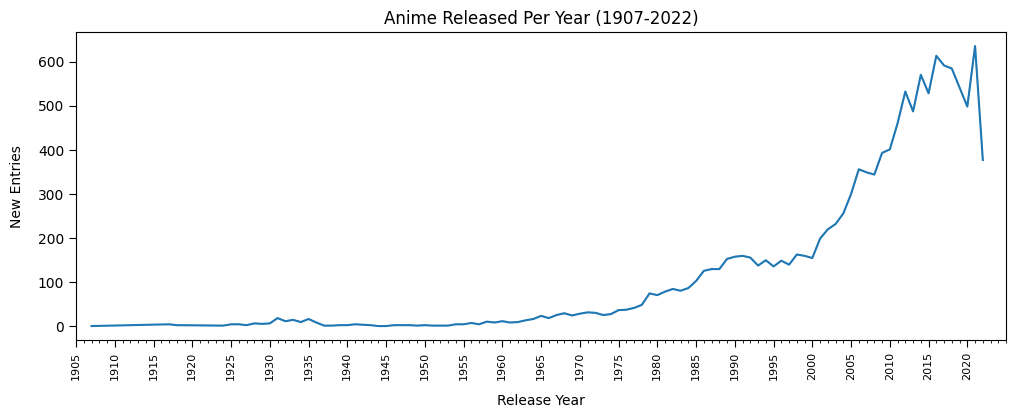

In [32]:
df = (anime_df[(anime_df['season_year'] <= today.year)].filter(['season_year', 'format']))
df['count'] = df.groupby('season_year')['season_year'].transform('count').apply(int)

step = 5
x_lim = [1905, 2025]

fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(ax=ax, data=df, x='season_year', y='count')
ax.set_title(f"Anime Released Per Year ({int(df['season_year'].min())}-{int(df['season_year'].max())})")

ax.set_xlabel('Release Year', labelpad=10)
ax.set_ylabel('New Entries', labelpad=10)

ax.set_xlim(x_lim)
ax.set_xticks(np.arange(x_lim[0], x_lim[1], step))
ax.set_xticklabels(ax.get_xticks(), rotation=90, fontsize=8)
ax.xaxis.set_minor_locator(mticker.AutoMinorLocator())

ax.tick_params(which='minor', length=2.5)
ax.tick_params(which='major', length=5)

plt.show()
plt.close()

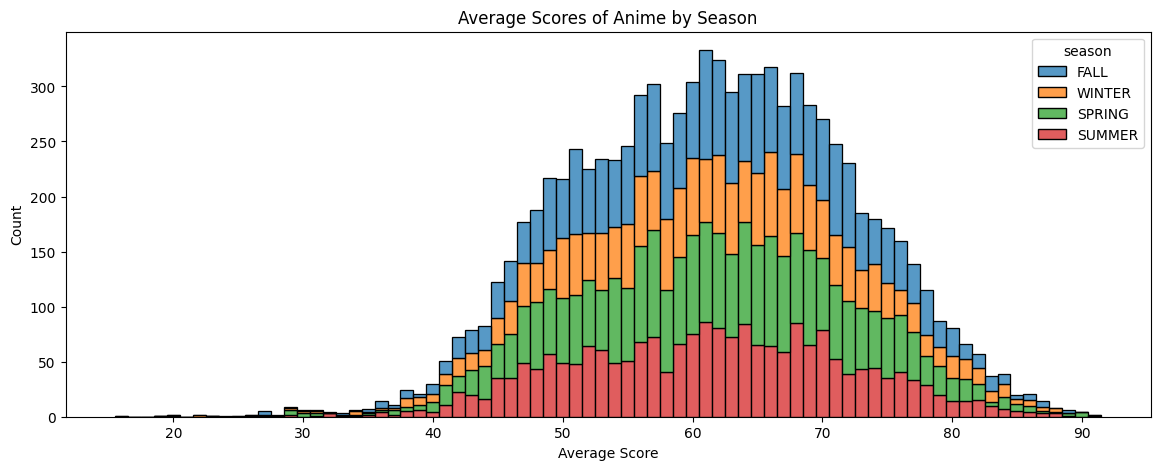

In [33]:
df = anime_raw_df.filter(['average_score', 'season']).dropna()

fig, ax = plt.subplots(figsize=(14,5))
sns.histplot(ax=ax, data=df, x='average_score', hue='season', multiple='stack', discrete=True)
ax.set(title='Average Scores of Anime by Season', xlabel='Average Score')

plt.show()
plt.close()

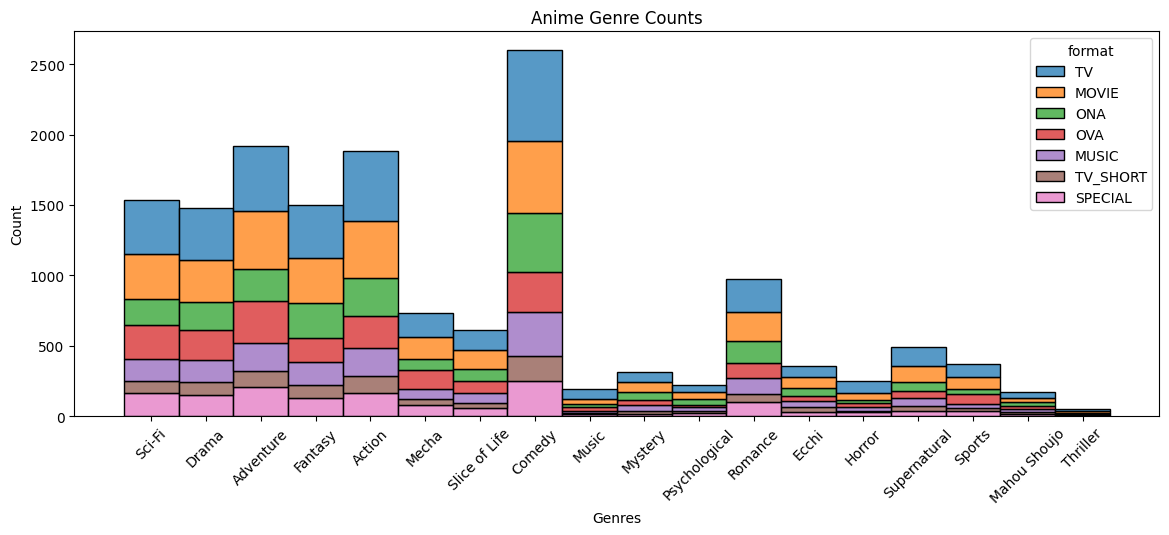

In [35]:
df = anime_raw_df.filter(['genres', 'format'])
df['genres'] = df['genres'].apply(json.loads).explode('genres').dropna()

fig, ax = plt.subplots(figsize=(14,5))
ax.set_title('Anime Genre Counts')
ax.set_xlabel('Genres', fontsize=10)
ax.tick_params(axis='x', rotation=45)
sns.histplot(ax=ax, data=df, x='genres', hue='format', multiple='stack', discrete=True)

plt.show()
plt.close()

In [61]:
# Top 25 Most Frequent Tags of Anilist

df = (anime_df).filter(['tags']).dropna()
df['tags'] = df['tags'].apply(json.loads).explode('tags')
df = df.groupby(['tags']).size().reset_index(name='count').sort_values('count', ascending=False)

df.head(25)

,tags,count
146,MALE PROTAGONIST,517
210,SHOUNEN,391
95,FEMALE PROTAGONIST,351
133,KIDS,316
216,SPACE,253
120,HISTORICAL,249
16,ANIMALS,219
203,SCHOOL,215
141,MAGIC,214
165,NUDITY,208


## User Data Visualizations

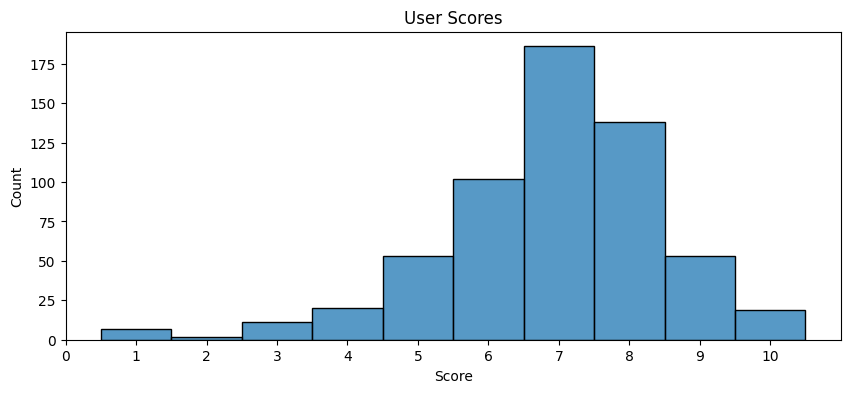

In [42]:
df = user_df[user_df['status'] == 'COMPLETED'].filter(['score', 'media_id']).dropna()

fig, ax = plt.subplots(figsize=(10,4))
sns.histplot(ax=ax, data=df, x='score', discrete=True)
ax.set(title='User Scores', xlabel='Score', xticks=np.arange(0, 11, 1))

plt.show()
plt.close()

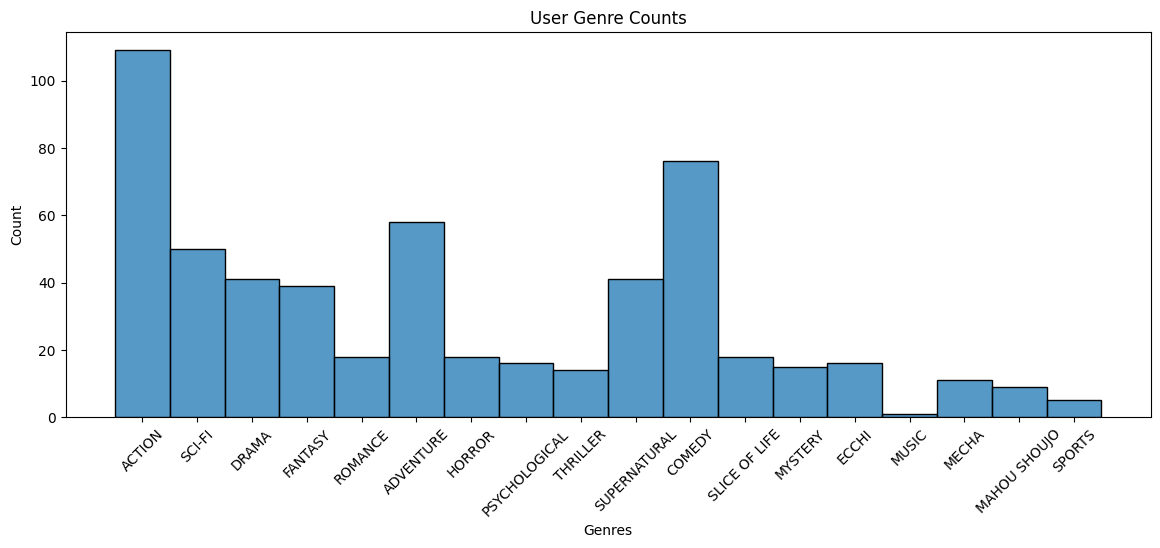

In [44]:
df = enriched_df.filter(['genres', 'score'])
df['genres'] = df['genres'].apply(json.loads).explode('genres').dropna()

fig, ax = plt.subplots(figsize=(14,5))
ax.set_title('User Genre Counts')
ax.set_xlabel('Genres', fontsize=10)
ax.tick_params(axis='x', rotation=45)
sns.histplot(ax=ax, data=df, x='genres', discrete=True)

plt.show()
plt.close()

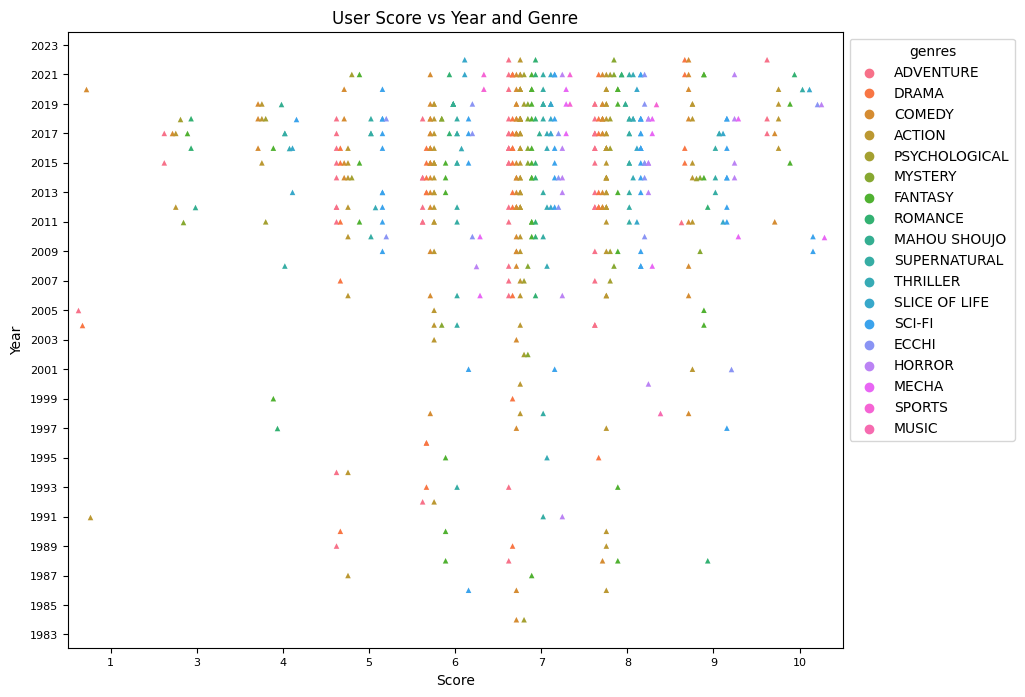

In [46]:
df = enriched_df.filter(['genres', 'score', 'season_year'])
df['genres'] = df['genres'].apply(json.loads).explode('genres').dropna()

fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('User Score vs Year and Genre')
ax.set_xlabel('Score', fontsize=10)
ax.set_ylabel('Year', fontsize=10)
ax.set_yticks(np.arange(df['season_year'].min()-5, df['season_year'].max()+5, 2))
ax.tick_params(labelsize=8)

sns.stripplot(ax=ax, data=df, x='score', y='season_year', hue='genres', dodge=True, jitter=0, s=4, marker='^')
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))

plt.show()
plt.grid()
plt.close()

In [60]:
# User Top 10 Most Watched Tags

df = enriched_df.filter(['tags'])
df['tags'] = df['tags'].apply(json.loads).explode('tags').dropna()
df = df.groupby(['tags']).size().reset_index(name='count').sort_values('count', ascending=False)

df.head(10)

,tags,count
81,MALE PROTAGONIST,23
141,TRAGEDY,15
67,GORE,13
69,HETEROSEXUAL,13
74,KUUDERE,12
120,SEINEN,12
42,DEMONS,12
52,ENSEMBLE CAST,10
56,FEMALE PROTAGONIST,10
133,SWORDPLAY,10


In [59]:
# User Top 25 Most Watched Studios

df = enriched_df.filter(['studios'])
df['studios'] = df['studios'].apply(json.loads).explode('studios').dropna()
df = df.groupby(['studios']).size().reset_index(name='count').sort_values('count', ascending=False)

df.head(25)

,studios,count
95,TOEI ANIMATION,49
49,MADHOUSE,31
3,A-1 PICTURES,27
16,BONES,24
41,J.C. STAFF,23
73,SILVER LINK.,23
44,KYOTO ANIMATION,22
65,PRODUCTION I.G,18
103,WHITE FOX,17
104,WIT STUDIO,16


/home/barrett/.local/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from current font.
  fig.canvas.draw()
/home/barrett/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/barrett/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


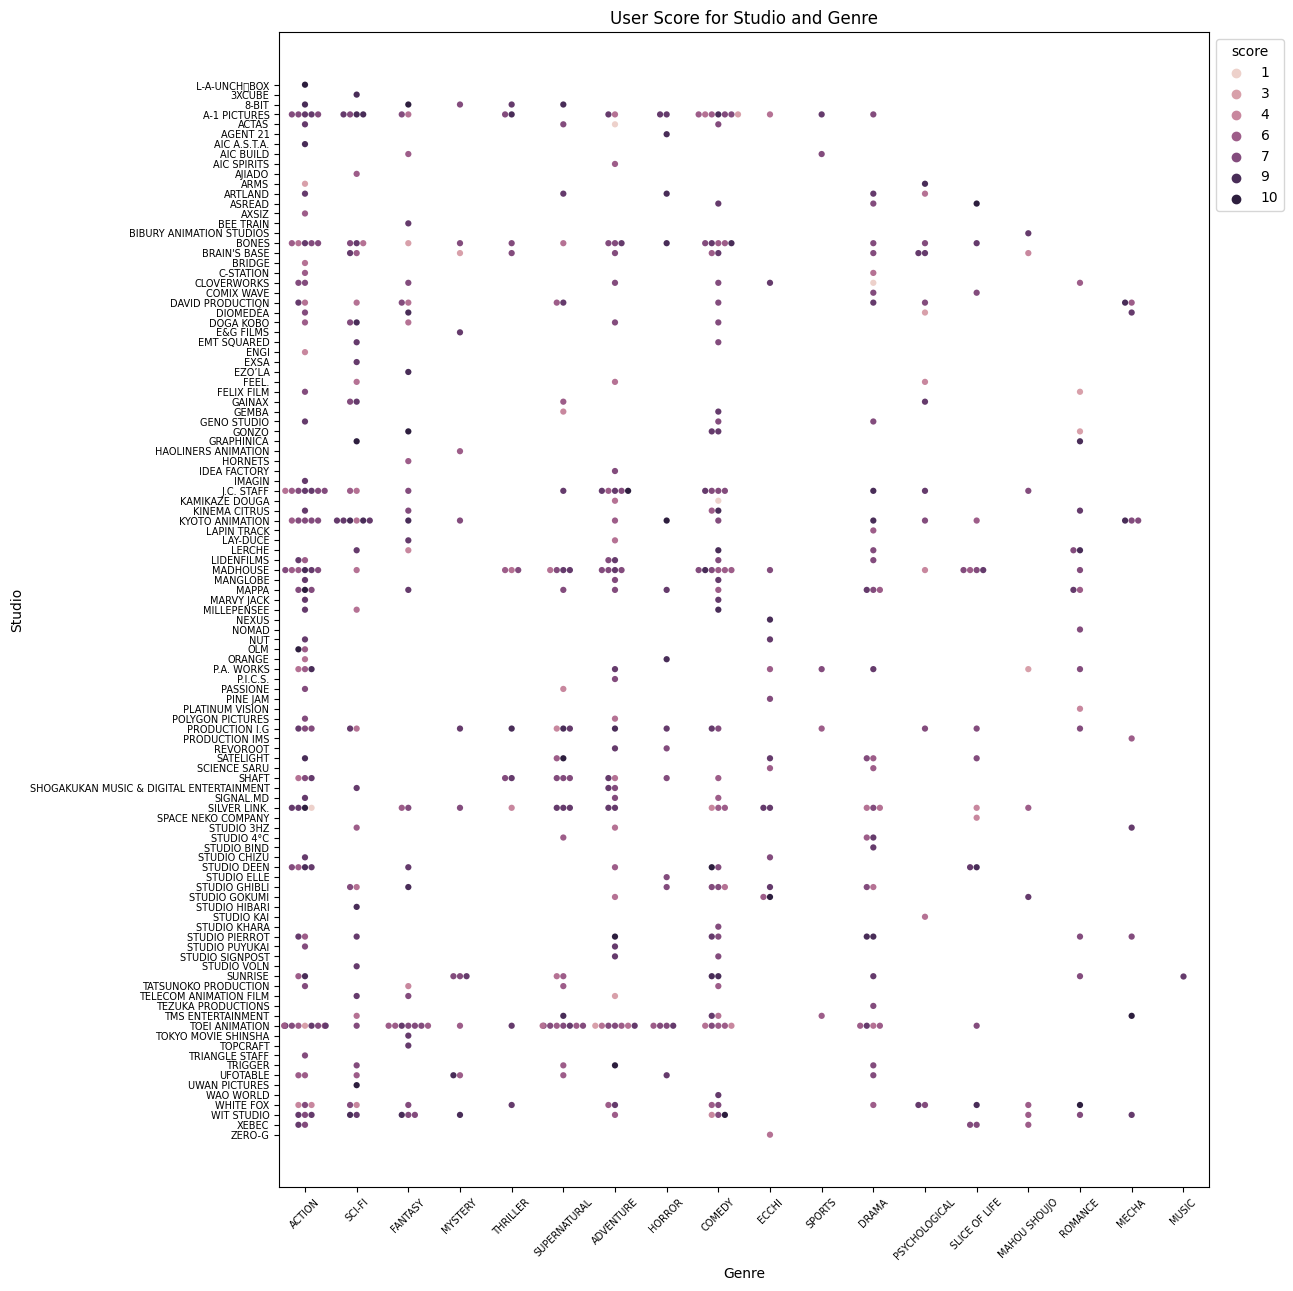

In [55]:
df = enriched_df.filter(['genres', 'score', 'studios'])
df['genres'] = df['genres'].apply(json.loads).explode('genres')
df['studios'] = df['studios'].apply(json.loads).explode('studios')
df = df.sort_values('studios')

fig, ax = plt.subplots(figsize=(12,15))
ax.set_title('User Score for Studio and Genre')
ax.set_xlabel('Genre', fontsize=10)
ax.set_ylabel('Studio', fontsize=10)
ax.tick_params(labelsize=7)
ax.tick_params(axis='x', rotation=45)

sns.swarmplot(ax=ax, data=df, x='genres', y='studios', hue='score', s=4.5)
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))

plt.show()
plt.grid()
plt.close()

In [58]:
# Attempt to extract keywords from description of anime

kw_extractor = yake.KeywordExtractor(lan='en', n=3, dedupLim=0.2, dedupFunc='jaro', top=5, features=None)

df = (pd.merge(user_df[user_df['status'].isin(['CURRENT','COMPLETED'])], anime_raw_df, left_on='media_id', right_on='id', how='inner')
            .filter(['description']))
df['keywords'] = df['description'].apply(kw_extractor.extract_keywords)

df.head(25)['keywords']

0     [(life form called, 0.001904559472413103), (Ja...
1     [(Yoshiko Hanabatake, 0.012976192088069658), (...
2     [(Tanbarun lives Shirayuki, 0.0034105947986595...
3     [(ruthless Prime Minister, 0.00047533681534899...
4     [(World War III, 0.0009678077271062191), (III,...
5     [(life before death, 0.02140299629709493), (SS...
6       [(tragic accident split, 0.004737258569048452)]
7     [(Kouichi Sakakibara transfers, 0.003248710688...
8     [(Kiyohara Hiro manga, 0.0005755795734265841),...
9            [(dimensions joined, 0.03734119103543422)]
10            [(nation of Cremona, 0.0076631853455056)]
11    [(Flying Pussyfoot, 0.00252531480959437), (war...
12     [(Vice President return, 0.0003152691419412414)]
13    [(yakuza failed, 0.018482683264423472), (time,...
14    [(Monogatari Series, 0.004403797397252039), (i...
15    [(cold ruthless killer, 0.003473959378765242),...
16    [(Includes Beatless Final, 0.08738465849681781...
17    [(Black Swordsman Guts, 0.0006002125610368